### Plotting UKESM data vs Satellite data for the Chuckchi sea region

In [99]:
# Load useful packages
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy
from datetime import datetime, timedelta
import numpy as np
import pyproj
from dask.diagnostics import ProgressBar
import matplotlib.dates as mdate
import intake
import cftime

### Import CMIP data

In [3]:
# open cmip6 online catalogue
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [4]:
cat = col.search(source_id=['CNRM-ESM2-1'], 
                 experiment_id=['historical'], table_id=['SImon','Omon','Ofx'], 
                 variable_id=['siconc','no3','areacello']) 
                 #member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
6,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
7,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
8,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
9,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Omon,no3,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125


In [5]:
# Create dictionary from the list of datasets we found
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [6]:
dset_dict.keys()

dict_keys(['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn', 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn', 'CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn'])

In [7]:
areacell = dset_dict[list(dset_dict.keys())[0]]
cnrm_si = dset_dict[list(dset_dict.keys())[1]]
cnrm_no3 = dset_dict[list(dset_dict.keys())[2]]

In [20]:
#areacell
cnrm_no3

<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, lev: 75, axis_nbounds: 2,
                  member_id: 11, time: 1980)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * lev          (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    lev_bounds   (lev, axis_nbounds) float64 dask.array<chunksize=(75, 2), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id    (member_id) <U9 'r1i1p1f2' 'r3i1p1f2' ... 'r11i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    no3          (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 4, 75, 294, 362), meta=np.ndarray>
Attributes: (12/56)
    realm:                   ocnBgchem
    variable_id:             no3
    status:                  2021-11-05;created; by gcs.cmip6.ldeo@gmail.com
    source_id:               CNRM-ESM2-1
    title:                   CNRM-ESM2-1 model output prepared for CMIP6 / CM...
    experiment:              all-forcing simulation of the recent past
    ...                      ...
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.CNRM-CERFAC...
    arpege_minor_version:    6.3.2
    Conventions:             CF-1.7 CMIP-6.2
    experiment_id:           historical
    references:              http://www.umr-cnrm.fr/cmip6/references
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

In [13]:
# Select region of interest from the Areacello variable: Chuckchi Sea
areac = areacell.areacello.where((areacell.lat>=70) & (areacell.lat<=80) & (areacell.lon <= 160) & (areacell.lon >= 100), drop = True)

In [14]:
areac = areac.isel(member_id = 0)
areac

<xarray.DataArray 'areacello' (y: 30, x: 37)>
dask.array<getitem, shape=(30, 37), dtype=float32, chunksize=(30, 37), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 dask.array<chunksize=(30, 37), meta=np.ndarray>
    lon        (y, x) float64 dask.array<chunksize=(30, 37), meta=np.ndarray>
    member_id  <U9 'r1i1p1f2'
Dimensions without coordinates: y, x
Attributes:
    cell_methods:      area: sum
    description:       Cell areas for any grid used to report ocean variables...
    history:           none
    long_name:         Grid-Cell Area
    online_operation:  once
    standard_name:     cell_area
    units:             m2

### Nitrate concentration

In [21]:
cnrm_no3_surf = cnrm_no3.isel(lev = 0)
cnrm_no3_en = cnrm_no3_surf.mean(dim = ['member_id'], keep_attrs=True)
cnrm_no3_CS = cnrm_no3_en.where((cnrm_no3_en.lat>=70) & (cnrm_no3_en.lat<=80) & (cnrm_no3_en.lon >=100 ) & (cnrm_no3_en.lon <= 160),drop = True)

In [24]:
# Select for the years that match the observations
cnrm_no3_obs = cnrm_no3_CS.sel(time = slice('2002','2014'))

In [25]:
# Calulated the area weighted average 
cnrm_no3 = (areac*cnrm_no3_obs).sum(dim=('y','x'))/areac.sum(dim=('y','x'))

In [26]:
# Create a monthly mean and standard deviation
cnrm_no3_monthly = cnrm_no3.groupby('time.month').mean(dim=['time']).compute()
cnrm_no3_monthly_sd = cnrm_no3.groupby('time.month').std(dim=['time']).compute()

### Sea Ice extent

In [27]:
# Average over the ensembles
cnrm_si_en = cnrm_si.mean(dim = ['member_id'], keep_attrs=True)
# Select area of interest: Chuckchi Sea
cnrm_si_CS = cnrm_si_en.where((cnrm_si_en.lat>=70) & (cnrm_si_en.lat<=80) & (cnrm_si_en.lon >=100 ) & (cnrm_si_en.lon <= 160),drop = True)

In [29]:
# Area weighted average of extent over the region
cnrm_iceExtent = ((xr.where(cnrm_si_CS['siconc']>15, 1.,0))*areac).sum(dim=['y','x'])

In [30]:
cnrm_si_obs = cnrm_iceExtent.sel(time = slice('2002','2014'))

In [31]:
# Create a monthly mean and standard deviation
cnrm_iceExt_monthly = cnrm_si_obs.groupby('time.month').mean().compute()
cnrm_iceExt_monthly_sd = cnrm_si_obs.groupby('time.month').std().compute()

### Include Satellite observations

In [43]:
# Import SIC observations
sat = xr.open_mfdataset("SICdata/AMSR*.nc", combine='by_coords')

In [46]:
# Change co-ordinates
# Output coordinates are in WGS 84 longitude and latitude
projOut = pyproj.Proj(init='epsg:4326')

# Input coordinates are in meters on the Polar Stereographic 
# projection given in the netCDF file
projIn = pyproj.Proj(init='epsg:3411',
    preserve_units=True)

xx, yy = np.meshgrid( sat.x.values, sat.y.values)
lon,lat= pyproj.transform(projIn, projOut, xx, yy )
sat['lon'] = (('y','x'),lon)
sat['lat'] = (('y','x'),lat)

/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_532/3463951465.py:11: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon,lat= pyproj.tr

In [47]:
# Select area of interest
sat_CS = sat.where((sat.lon>=100) & (sat.lon<=160) & (sat.lat <=80 ) & (sat.lat >= 70),drop = True)

In [49]:
# Select for overlapping time period with the model output
sat_obs = sat_CS.sel(time = slice('2002','2014'))

In [50]:
area = 6.25**2
sat_Ext = (xr.where(sat_obs.z>15, 1.,0).sum(dim=['x','y']))*area
sat_Ext_monthly = sat_Ext.groupby('time.month').mean().compute()
sat_Ext_monthly_sd = sat_Ext.groupby('time.month').std().compute()

### Make a figure

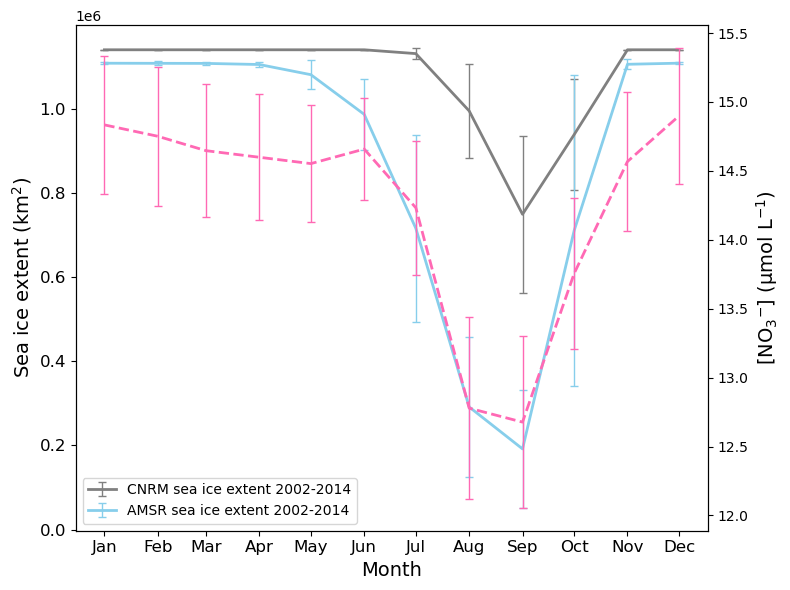

In [53]:
fig, ax = plt.subplots(figsize = (8,6))
with ProgressBar():
    ax.errorbar([datetime.strptime(str(m).zfill(2), '%m') for m in cnrm_iceExt_monthly.month.values],
            cnrm_iceExt_monthly/1e6, yerr = cnrm_iceExt_monthly_sd/1e6, capsize = 3, elinewidth = 1,
                color='grey',
                lw = 2, label = 'CNRM sea ice extent 2002-2014',
           linestyle = '-')
ax.errorbar([datetime.strptime(str(m).zfill(2), '%m') for m in cnrm_iceExt_monthly.month.values],
            sat_Ext_monthly, yerr = sat_Ext_monthly_sd, capsize = 3, elinewidth = 1,
                color='skyblue',
                lw = 2, label = 'AMSR sea ice extent 2002-2014',
           linestyle = '-')

ax2 = ax.twinx()
ax2.errorbar(x = [datetime.strptime(str(m).zfill(2), '%m') for m in cnrm_iceExt_monthly.month.values],
            y = cnrm_no3_monthly['no3']*1e3, yerr = cnrm_no3_monthly_sd['no3']*1e3, capsize = 3, elinewidth = 1,
                color='hotpink',
                lw = 2, label = r'CNRM [NO${_3}^{-}$] 2002-2014',
           linestyle = '--')
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel(r'Sea ice extent (km${^2})$', fontsize=14)
ax2.set_ylabel(r'[NO${_3}^{-}$] (μmol L$^{-1})$', fontsize=14)
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
ax.legend(loc = 'best')
#ax2.legend(loc = 'best')
fmt = mdate.DateFormatter('%b')
ax.xaxis.set_major_formatter(fmt)
ax.xaxis.set_major_locator(mdate.MonthLocator())
plt.tight_layout()

(array([32., 23., 75., 53., 55., 41., 36., 16.,  8.,  7.,  2.,  2.,  0.,
         9.,  5.,  3., 10.,  1.,  3.,  2.]),
 array([ 12460.9375  ,  47732.421875,  83003.90625 , 118275.390625,
        153546.875   , 188818.359375, 224089.84375 , 259361.328125,
        294632.8125  , 329904.296875, 365175.78125 , 400447.265625,
        435718.75    , 470990.234375, 506261.71875 , 541533.203125,
        576804.6875  , 612076.171875, 647347.65625 , 682619.140625,
        717890.625   ]),
 <BarContainer object of 20 artists>)

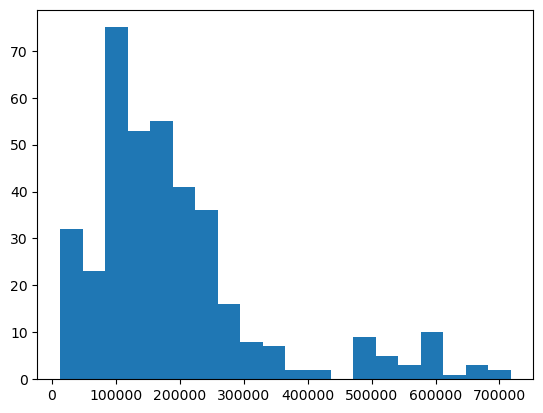

In [56]:
xvar = sat_Ext.groupby('time.month')[9]
plt.hist(xvar, bins = 20)

In [60]:
year = sat_Ext.groupby('time.year')
doy = sat_Ext.groupby('time.dayofyear')

In [79]:
table = []
for i in range(1,367):
    table.append(doy[i])

In [122]:
test = sat_Ext.time.values.reshape(13,366)

ValueError: cannot reshape array of size 4294 into shape (13,366)

In [120]:
#np.unique(sat_Ext.time.dt.dayofyear.values).size
np.unique(sat_Ext.time.dt.year.values).size

13

In [105]:

#doy[1].time.dt.year
#year[2003].time.dt.dayofyear
sat_Ext.time.dt.dayofyear.values

array([152, 153, 154, ..., 363, 364, 365])

In [106]:
np.array([
    [datetime(int(y),1,1) + timedelta(int(d)) for d in sat_Ext.time.dt.dayofyear.values]
    for y in sat_Ext.time.dt.year.values])

array([[datetime.datetime(2002, 6, 2, 0, 0),
        datetime.datetime(2002, 6, 3, 0, 0),
        datetime.datetime(2002, 6, 4, 0, 0), ...,
        datetime.datetime(2002, 12, 30, 0, 0),
        datetime.datetime(2002, 12, 31, 0, 0),
        datetime.datetime(2003, 1, 1, 0, 0)],
       [datetime.datetime(2002, 6, 2, 0, 0),
        datetime.datetime(2002, 6, 3, 0, 0),
        datetime.datetime(2002, 6, 4, 0, 0), ...,
        datetime.datetime(2002, 12, 30, 0, 0),
        datetime.datetime(2002, 12, 31, 0, 0),
        datetime.datetime(2003, 1, 1, 0, 0)],
       [datetime.datetime(2002, 6, 2, 0, 0),
        datetime.datetime(2002, 6, 3, 0, 0),
        datetime.datetime(2002, 6, 4, 0, 0), ...,
        datetime.datetime(2002, 12, 30, 0, 0),
        datetime.datetime(2002, 12, 31, 0, 0),
        datetime.datetime(2003, 1, 1, 0, 0)],
       ...,
       [datetime.datetime(2014, 6, 2, 0, 0),
        datetime.datetime(2014, 6, 3, 0, 0),
        datetime.datetime(2014, 6, 4, 0, 0), ...,
        

In [109]:
Ext2D = np.array([[
    sat_Ext.sel(time = datetime(int(y),1,1) + timedelta(int(d))) for d in sat_Ext.time.dt.dayofyear.values]
    for y in sat_Ext.time.dt.year.values])

KeyError: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."

In [157]:
#timearr =np.array([[(datetime(int(y),1,1) + timedelta(int(d))) for d in np.unique(sat_Ext.time.dt.dayofyear.values)]
#    for y in np.unique(sat_Ext.time.dt.year.values)[:2] ])

In [167]:
timearr =np.array([[(datetime(int(y),1,1) + timedelta(int(d-1))) for d in np.unique(sat_Ext.time.dt.dayofyear.values)]
    for y in range(2005,2007)])

In [168]:
timearr

array([[datetime.datetime(2005, 1, 1, 0, 0),
        datetime.datetime(2005, 1, 2, 0, 0),
        datetime.datetime(2005, 1, 3, 0, 0),
        datetime.datetime(2005, 1, 4, 0, 0),
        datetime.datetime(2005, 1, 5, 0, 0),
        datetime.datetime(2005, 1, 6, 0, 0),
        datetime.datetime(2005, 1, 7, 0, 0),
        datetime.datetime(2005, 1, 8, 0, 0),
        datetime.datetime(2005, 1, 9, 0, 0),
        datetime.datetime(2005, 1, 10, 0, 0),
        datetime.datetime(2005, 1, 11, 0, 0),
        datetime.datetime(2005, 1, 12, 0, 0),
        datetime.datetime(2005, 1, 13, 0, 0),
        datetime.datetime(2005, 1, 14, 0, 0),
        datetime.datetime(2005, 1, 15, 0, 0),
        datetime.datetime(2005, 1, 16, 0, 0),
        datetime.datetime(2005, 1, 17, 0, 0),
        datetime.datetime(2005, 1, 18, 0, 0),
        datetime.datetime(2005, 1, 19, 0, 0),
        datetime.datetime(2005, 1, 20, 0, 0),
        datetime.datetime(2005, 1, 21, 0, 0),
        datetime.datetime(2005, 1, 22, 0, 0

In [158]:
ext2D = np.array([[sat_Ext.sel(time = x) if np.datetime64(str(x)) in sat_Ext.time else np.NaN for x in line] for line in timearr])
#ext = sat_Ext.sel(time = x) for x in timearr 

KeyboardInterrupt: 

In [140]:
ext2D.shape

(13, 366)

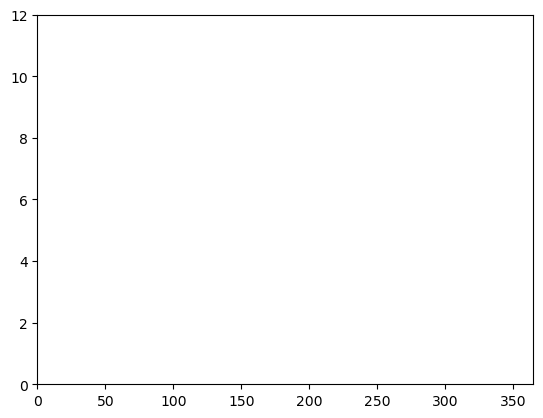

In [169]:
plt.contourf(ext2D)

In [111]:
sat_Ext.sel(time = datetime(int(2005),1,1) + timedelta(int(1)))

<xarray.DataArray 'z' ()>
dask.array<getitem, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 2005-01-02